## Final Project Submission

Please fill out:
* Student name: Dicchyant Gurung
* Student pace: Self paced 
* Scheduled project review date/time: 5/30/2021
* Instructor name: Jeff Herman
* Blog post URL:https://dicchyanttamu.wixsite.com/data/post/line-graph-visualization


### Business Case

The Vehicle Safety Board is looking to reduce the number of accidents in the City of Chicago. Utilizing the car crash data received from the Chicago Data Portal, we will perform some meaningful EDA and provide recommendations to the Vehicle Safety Board.

Firstly, we will do some data exploration to answer the following three problem statements. We will then use the results to identify areas for improvement and come up with actionable steps that will help reduce the number of accidents in the City of Chicago.

**1. Identify high-density areas of car crash in Chicago**

**2. Analyze control failures to identify opportunities for improvement**

**3. Check for trends in the time of crash to relocate resources appropriately**

Furthermore, we will create a classifier to categorize the accidents in two main cateogories for future references:

**1. Unintentional:** These are events or instances where the driver was unaware of the possibility of an accident.

**2. Intentional:** These are events or instances where the driver was fully aware of the possibility of an accident.

### Import relevant packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, roc_curve, roc_auc_score, \
mean_squared_error, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel 
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
df_raw_crashes = pd.read_csv(r"Traffic_Crashes_-_Crashes.csv")

In [3]:
df_raw_vehicles = pd.read_csv(r"Traffic_Crashes_-_Vehicles.csv", dtype='unicode')

In [4]:
df_raw_people = pd.read_csv(r"Traffic_Crashes_-_People.csv", dtype='unicode')

### Clean the Data

#### 1. Traffic Crashes Dataset

In [5]:
df_raw_crashes.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [6]:
df_raw_crashes.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [7]:
df_raw_crashes.iloc[:5,25:]

,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,N,MARMORA AVE,2515.0,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,S,CICERO AVE,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,E,67TH ST,331.0,NaN,NaN,NaN,NaN,NaN,NaN,3,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,E,51ST ST,224.0,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


Using some domain knowledge and relevance to the target variable i.e 'Contributory Cause', we have decided to remove the below columns.

In [8]:
columns_to_delete = ['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE','LANE_CNT','REPORT_TYPE','DATE_POLICE_NOTIFIED', 
 'SEC_CONTRIBUTORY_CAUSE','STREET_NO','STREET_DIRECTION', 'STREET_NAME','PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'BEAT_OF_OCCURRENCE', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL','INJURIES_FATAL',
'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
'INJURIES_UNKNOWN']

In [9]:
df_crashes_clean = df_raw_crashes.drop(columns_to_delete, axis=1).copy()

In [10]:
df_crashes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488290 entries, 0 to 488289
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          488290 non-null  object 
 1   POSTED_SPEED_LIMIT       488290 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE   488290 non-null  object 
 3   DEVICE_CONDITION         488290 non-null  object 
 4   WEATHER_CONDITION        488290 non-null  object 
 5   LIGHTING_CONDITION       488290 non-null  object 
 6   FIRST_CRASH_TYPE         488290 non-null  object 
 7   TRAFFICWAY_TYPE          488290 non-null  object 
 8   ALIGNMENT                488290 non-null  object 
 9   ROADWAY_SURFACE_COND     488290 non-null  object 
 10  ROAD_DEFECT              488290 non-null  object 
 11  CRASH_TYPE               488290 non-null  object 
 12  INTERSECTION_RELATED_I   110179 non-null  object 
 13  NOT_RIGHT_OF_WAY_I       23000 non-null   object 
 14  HIT_

In [11]:
df_crashes_clean.isnull().sum()

CRASH_RECORD_ID                 0
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DEVICE_CONDITION                0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
TRAFFICWAY_TYPE                 0
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
CRASH_TYPE                      0
INTERSECTION_RELATED_I     378111
NOT_RIGHT_OF_WAY_I         465290
HIT_AND_RUN_I              344338
DAMAGE                          0
PRIM_CONTRIBUTORY_CAUSE         0
DOORING_I                  486732
WORK_ZONE_I                485150
WORK_ZONE_TYPE             485815
WORKERS_PRESENT_I          487538
NUM_UNITS                       0
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
CRASH_MONTH                     0
LATITUDE                     2715
LONGITUDE                    2715
LOCATION                     2715
dtype: int64

In [12]:
df_crashes_clean.shape

(488290, 28)

Compared to total values of 488,290, we have majority of values missing for 'Intersection_related', 'Not_right_of_way', 'Hit_and_run', 'Dooring', 'Work_zone', 'Work_Zone_Type', and 'Workers_Present'. We will remove these as well.

In [13]:
df_crashes_clean.drop(labels=['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I'], axis=1, inplace=True)

In [14]:
df_crashes_clean.isnull().sum()

CRASH_RECORD_ID               0
POSTED_SPEED_LIMIT            0
TRAFFIC_CONTROL_DEVICE        0
DEVICE_CONDITION              0
WEATHER_CONDITION             0
LIGHTING_CONDITION            0
FIRST_CRASH_TYPE              0
TRAFFICWAY_TYPE               0
ALIGNMENT                     0
ROADWAY_SURFACE_COND          0
ROAD_DEFECT                   0
CRASH_TYPE                    0
DAMAGE                        0
PRIM_CONTRIBUTORY_CAUSE       0
NUM_UNITS                     0
CRASH_HOUR                    0
CRASH_DAY_OF_WEEK             0
CRASH_MONTH                   0
LATITUDE                   2715
LONGITUDE                  2715
LOCATION                   2715
dtype: int64

Drop all remaining null values

In [15]:
df_crashes_clean.dropna(axis=0, inplace=True)

In [16]:
df_crashes_clean.isnull().sum()

CRASH_RECORD_ID            0
POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
NUM_UNITS                  0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
LOCATION                   0
dtype: int64

In [17]:
df_crashes_clean.shape

(485575, 21)

In [18]:
df_crashes_clean.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,2,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,2,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,3,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,NO INJURY / DRIVE AWAY,$500 OR LESS,UNABLE TO DETERMINE,2,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
5,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,2,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)


Now, let's check the unique catergories that are present in each of our variables.

#### Predictors

In [19]:
for col in df_crashes_clean.columns[1:]:
    print('\n' + col + '\n')
    print(df_crashes_clean[col].value_counts())


POSTED_SPEED_LIMIT

30    357950
35     33494
25     29500
20     18806
15     16964
10     10251
0       6760
40      4419
5       3663
45      2786
55       377
3        116
50        97
9         91
99        66
39        55
1         35
60        24
2         20
24        17
32        14
33        10
34        10
65        10
6          7
36         5
11         5
70         3
14         2
12         2
18         2
26         2
31         2
7          2
4          1
49         1
63         1
16         1
23         1
29         1
38         1
22         1
Name: POSTED_SPEED_LIMIT, dtype: int64

TRAFFIC_CONTROL_DEVICE

NO CONTROLS                 279611
TRAFFIC SIGNAL              135097
STOP SIGN/FLASHER            48266
UNKNOWN                      15642
OTHER                         2877
LANE USE MARKING              1173
YIELD                          683
OTHER REG. SIGN                469
OTHER WARNING SIGN             410
RAILROAD CROSSING GATE         319
PEDESTRIAN CROSSING

POINT (-87.905309125103 41.976201139024)    630
POINT (-87.585971992965 41.751460603167)    330
POINT (-87.580147768689 41.791420282098)    327
POINT (-87.585275565077 41.722257273006)    272
POINT (-87.619928173678 41.900958919109)    249
                                           ... 
POINT (-87.65466342189 41.929510712185)       1
POINT (-87.671047155512 41.861432789653)      1
POINT (-87.768514513686 41.890191561862)      1
POINT (-87.616438686344 41.85814439992)       1
POINT (-87.763732812056 41.89541483226)       1
Name: LOCATION, Length: 212660, dtype: int64


In [20]:
df_crashes_clean.shape

(485575, 21)

#### Target Variable

In [21]:
df_crashes_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 179914
FAILING TO YIELD RIGHT-OF-WAY                                                        53397
FOLLOWING TOO CLOSELY                                                                51452
NOT APPLICABLE                                                                       26041
IMPROPER OVERTAKING/PASSING                                                          23035
IMPROPER BACKING                                                                     21246
FAILING TO REDUCE SPEED TO AVOID CRASH                                               20916
IMPROPER LANE USAGE                                                                  18669
IMPROPER TURNING/NO SIGNAL                                                           16077
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  15155
DISREGARDING TRAFFIC SIGNALS                                                          8793

Target variable 'Unable to determine' does not add any value to our project. Let's remove these rows.

In [22]:
df_crashes_final = df_crashes_clean[(df_crashes_clean.PRIM_CONTRIBUTORY_CAUSE != 'UNABLE TO DETERMINE') &
                                    (df_crashes_clean.PRIM_CONTRIBUTORY_CAUSE != 'NOT APPLICABLE')].copy()

In [23]:
df_crashes_final.shape

(279620, 21)

We have 19 variables from our crash dataset. Let's explore other datasets to see what we can find.

#### 2. Traffic Vehicle Dataset

In [24]:
df_raw_vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_raw_vehicles.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       '

Using some domain knowledge we can remove most columns.

In [26]:
columns_to_delete_vehicles = ['CRASH_UNIT_ID', 'RD_NO', 'CRASH_DATE',
       'NUM_PASSENGERS', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'CMRC_VEH_I',
       'LIC_PLATE_STATE','TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH',
       'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG',
       'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I',
       'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS']

In [27]:
df_vehicles_clean = df_raw_vehicles.drop(columns_to_delete_vehicles, axis=1)

In [28]:
df_vehicles_clean.head()

,CRASH_RECORD_ID,UNIT_NO,UNIT_TYPE,VEHICLE_ID,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,EXCEED_SPEED_LIMIT_I,FIRST_CONTACT_POINT
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,1,DRIVER,796949,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,FRONT
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,1,DRIVER,834816,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,FRONT
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,2,PARKED,834819,NONE,UNKNOWN/NA,PERSONAL,N,PARKED,NaN,ROOF
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,3,PARKED,834817,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,N,PARKED,NaN,ROOF
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,2,DRIVER,827212,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,FRONT-RIGHT


In [29]:
df_vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996986 entries, 0 to 996985
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CRASH_RECORD_ID       996986 non-null  object
 1   UNIT_NO               996986 non-null  object
 2   UNIT_TYPE             995493 non-null  object
 3   VEHICLE_ID            974042 non-null  object
 4   VEHICLE_DEFECT        974042 non-null  object
 5   VEHICLE_TYPE          974042 non-null  object
 6   VEHICLE_USE           974042 non-null  object
 7   TRAVEL_DIRECTION      974042 non-null  object
 8   MANEUVER              974042 non-null  object
 9   EXCEED_SPEED_LIMIT_I  2389 non-null    object
 10  FIRST_CONTACT_POINT   967486 non-null  object
dtypes: object(11)
memory usage: 83.7+ MB


In [30]:
df_vehicles_clean.isnull().sum()

CRASH_RECORD_ID              0
UNIT_NO                      0
UNIT_TYPE                 1493
VEHICLE_ID               22944
VEHICLE_DEFECT           22944
VEHICLE_TYPE             22944
VEHICLE_USE              22944
TRAVEL_DIRECTION         22944
MANEUVER                 22944
EXCEED_SPEED_LIMIT_I    994597
FIRST_CONTACT_POINT      29500
dtype: int64

The EXCEED_SPEED_LIMIT column has maximum entries missings. Let's drop this before we remove all missing values.

In [31]:
df_vehicles_clean.drop('EXCEED_SPEED_LIMIT_I', axis=1, inplace=True)

In [32]:
df_vehicles_clean.isnull().sum()

CRASH_RECORD_ID            0
UNIT_NO                    0
UNIT_TYPE               1493
VEHICLE_ID             22944
VEHICLE_DEFECT         22944
VEHICLE_TYPE           22944
VEHICLE_USE            22944
TRAVEL_DIRECTION       22944
MANEUVER               22944
FIRST_CONTACT_POINT    29500
dtype: int64

In [33]:
df_vehicles_clean.dropna(axis=0, inplace=True)

In [34]:
df_vehicles_clean.isnull().sum()

CRASH_RECORD_ID        0
UNIT_NO                0
UNIT_TYPE              0
VEHICLE_ID             0
VEHICLE_DEFECT         0
VEHICLE_TYPE           0
VEHICLE_USE            0
TRAVEL_DIRECTION       0
MANEUVER               0
FIRST_CONTACT_POINT    0
dtype: int64

Let's look into what each of the predictors have as it's classes.

In [35]:
for col in df_vehicles_clean.columns[1:]:
    print('\n' + col + '\n')
    print(df_vehicles_clean[col].value_counts())


UNIT_NO

1          483542
2          444572
3           30661
4            6166
5            1623
6             523
7             202
8              85
9              47
10             21
11             12
12              7
13              4
14              4
15              3
0               3
16              2
18              1
3778035         1
17              1
Name: UNIT_NO, dtype: int64

UNIT_TYPE

DRIVER                 831739
PARKED                 126401
DRIVERLESS               9182
NON-CONTACT VEHICLE        82
DISABLED VEHICLE           76
Name: UNIT_TYPE, dtype: int64

VEHICLE_ID

60258     1
568885    1
301396    1
518524    1
965346    1
         ..
30491     1
528315    1
459297    1
345392    1
410962    1
Name: VEHICLE_ID, Length: 967480, dtype: int64

VEHICLE_DEFECT

NONE                562541
UNKNOWN             395046
OTHER                 4831
BRAKES                3321
TIRES                  464
STEERING               432
WHEELS                 230
SUSPENSION  

Couple things we can make out from the above details:

- We will use 'VEHICLE_ID' to merge this dataset with the People dataset. We will drop 'CRASH_RECORD_ID'.
- UNIT_NO is the number of parties involved. We are not concerned with the count so we will drop this.
- UNIT_TYPE seems to be an irrelevant columns. We will drop this.
- VEHICLE_DEFECT has about 90% of the data as NONE or UNKNOWN. We will drop this as well.
- VEHICLE_TYPE is spread pretty thin outside of PASSENGER and SUV. We will drop this column as well.
- VEHICLE_USE has majority PERSONAL and UNKNOWN. We will drop this.
- TRAVEL_DIRECTION does not add much to the cause. We will drop this.
- FIRST_CONTACT_POINT also does not lead to the cause. We will drop this.

In [36]:
cols_to_delete_vehicles = ['CRASH_RECORD_ID', 'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE','TRAVEL_DIRECTION','FIRST_CONTACT_POINT']

In [37]:
df_vehicles_clean.drop(cols_to_delete_vehicles, axis=1, inplace=True)

In [38]:
df_vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967480 entries, 0 to 996984
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   VEHICLE_ID  967480 non-null  object
 1   MANEUVER    967480 non-null  object
dtypes: object(2)
memory usage: 22.1+ MB


In [39]:
df_vehicles_final = df_vehicles_clean.copy()

Moving on to people data set.

#### 3. Traffic People Dataset

In [40]:
df_raw_people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [41]:
df_raw_people.shape

(1078794, 30)

In [42]:
df_raw_people.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

With the people dataset, we will be looking at the characterstics of the person and action he/she took to determine the cause fo the accident. With this in mind we can delete the following variables.

In [43]:
columns_to_delete_people = ['PERSON_ID', 'RD_NO', 'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 
       'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO','PEDPEDAL_LOCATION']

In [44]:
df_people_clean = df_raw_people.drop(columns_to_delete_people, axis=1).copy()

In [45]:
df_people_clean.head()

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816,M,25,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212,M,37,NONE,NOT OBSCURED,NORMAL,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579,X,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598,X,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600,X,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [46]:
df_people_clean.isnull().sum()

PERSON_TYPE                  0
CRASH_RECORD_ID              0
VEHICLE_ID               21321
SEX                      15993
AGE                     307617
DRIVER_ACTION           222354
DRIVER_VISION           222636
PHYSICAL_CONDITION      221732
PEDPEDAL_ACTION        1058768
PEDPEDAL_VISIBILITY    1058811
BAC_RESULT              221238
BAC_RESULT VALUE       1077406
CELL_PHONE_USE         1077637
dtype: int64

In [47]:
df_people_clean.shape

(1078794, 13)

Majority values are missing for 'PEPPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'BAC_RESULT_VALUE', and 'CELL_PHONE_USE'. We will drop these columns.

In [48]:
df_people_clean.drop(['PEDPEDAL_ACTION','PEDPEDAL_VISIBILITY', 'BAC_RESULT VALUE', 'CELL_PHONE_USE'], axis=1, inplace=True)

In [49]:
df_people_clean.isnull().sum()

PERSON_TYPE                0
CRASH_RECORD_ID            0
VEHICLE_ID             21321
SEX                    15993
AGE                   307617
DRIVER_ACTION         222354
DRIVER_VISION         222636
PHYSICAL_CONDITION    221732
BAC_RESULT            221238
dtype: int64

Let's check the unique categories in each of our remainder variables.

In [50]:
for col in df_people_clean.columns:
    print('\n' + col + '\n')
    print(df_people_clean[col].value_counts())


PERSON_TYPE

DRIVER                 837641
PASSENGER              220280
PEDESTRIAN              12469
BICYCLE                  7249
NON-MOTOR VEHICLE         954
NON-CONTACT VEHICLE       201
Name: PERSON_TYPE, dtype: int64

CRASH_RECORD_ID

31ecf6862c691ff12d3856213b902c146b07337b42a5692e3a176a66d684d221028bb5118ef6d67a313bcaed9e97bee1855cb1f5e8650f49e8dc17663475a1ee    61
13026c7fb51566d9ca487a093e38c6f5621c2ec25be48c306b6574983b61daeee589524b96bb2bfe66ddd0f695c8d2bf3ab0297558528e9c7a70363c763d6bd1    50
1829f52c1281a0396ef94692331b3dc530bc4be5a54cd55e94c24a5e5e49b800fbcf9f24dabe4c8277c8964ad05aadc89e90fd94021959d6dff5fad55480d595    46
c727dc759107cf17b2e8141149347128bb4bc26b026c7805562206c7c5761c543dd7cc0e47fc11379455a2ecbb2847c3d1744d6feb78f276d9a457e9beeb6121    45
60fbcef1942e23e9d93ba3fd5dd7f1da2c5b1e4bcc30731363a0f9ed822b5971a38d109cace85875dc2a7321d8a28ba40f24548d9ddd728f600af3b08c036a70    44
                                                                                 

Looking at the details above:

- We are only intersted in the DRIVER for PERSON_TYPE. We will slice the rest out of the dataset.
- 'SEX - X' and negative 'AGE' values will also be out of scope. We will slice them out of the dataset.
- DRIVER_ACTION seems like a target variable rather than a predictor. We will drop this column.
- BAC_RESULT has mostly TEST NOT OFFERED. the rest of the data will not be able to add any weight for this column. We will drop this as well.

In [51]:
cols_to_delete_people = ['BAC_RESULT']

In [52]:
df_people_clean.drop(cols_to_delete_people, axis=1, inplace=True)

Now let's slice the PERSON_TYPE, AGE and SEX columns.

In [53]:
df_people_final = df_people_clean[(df_people_clean['PERSON_TYPE'] == 'DRIVER') & 
                                  (df_people_clean['SEX'] != 'X') &
                                  (df_people_clean['AGE'] > '0')].copy()

In [54]:
df_people_final.head()

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION
0,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816,M,25,UNKNOWN,UNKNOWN,UNKNOWN
1,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212,M,37,NONE,NOT OBSCURED,NORMAL
12,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,805348,F,34,UNKNOWN,NOT OBSCURED,NORMAL
13,DRIVER,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,832624,M,53,UNKNOWN,UNKNOWN,NORMAL
14,DRIVER,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,833984,M,65,UNKNOWN,UNKNOWN,NORMAL


In [55]:
df_people_final.shape

(613186, 8)

### Merge all datasets

Now, that all the datasets are cleaned, let's merge them.

In [56]:
df1 = df_crashes_final
df2 = df_vehicles_final
df3 = df_people_final

Starting with the *Vehicle* and *People* datasets, since these are instances reported for the crash aka vehicle involved. Let's use the Vehicle_ID as the unique ID to merge these two datasets.

In [57]:
df_v = pd.merge(df2, df3, on=['VEHICLE_ID'], how = 'inner')

In [58]:
df_v

,VEHICLE_ID,MANEUVER,PERSON_TYPE,CRASH_RECORD_ID,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION
0,796949,STRAIGHT AHEAD,DRIVER,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,M,35,NONE,NOT OBSCURED,NORMAL
1,834816,STRAIGHT AHEAD,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,25,UNKNOWN,UNKNOWN,UNKNOWN
2,827212,STRAIGHT AHEAD,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,37,NONE,NOT OBSCURED,NORMAL
3,792247,STRAIGHT AHEAD,DRIVER,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,F,32,DISREGARDED CONTROL DEVICES,NOT OBSCURED,NORMAL
4,792252,STRAIGHT AHEAD,DRIVER,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,F,37,NONE,NOT OBSCURED,NORMAL
...,...,...,...,...,...,...,...,...,...
608330,1006407,STRAIGHT AHEAD,DRIVER,927b6872d8bd9525e808e2f89d962b96e56b64c734ecdf...,F,29,OTHER,UNKNOWN,NORMAL
608331,1006408,TURNING LEFT,DRIVER,927b6872d8bd9525e808e2f89d962b96e56b64c734ecdf...,M,42,OTHER,UNKNOWN,NORMAL
608332,1007674,STRAIGHT AHEAD,DRIVER,779616321ef7268ea183bea47805a63bc4f9bc6819c4ac...,M,27,FAILED TO YIELD,NOT OBSCURED,NORMAL
608333,1007675,STRAIGHT AHEAD,DRIVER,779616321ef7268ea183bea47805a63bc4f9bc6819c4ac...,M,53,NONE,NOT OBSCURED,NORMAL


In [59]:
df_a = pd.merge(df_v, df1, on=['CRASH_RECORD_ID'], how='inner')

In [60]:
df_a

,VEHICLE_ID,MANEUVER,PERSON_TYPE,CRASH_RECORD_ID,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,POSTED_SPEED_LIMIT,...,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,827212,STRAIGHT AHEAD,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,37,NONE,NOT OBSCURED,NORMAL,30,...,NO INJURY / DRIVE AWAY,$500 OR LESS,IMPROPER OVERTAKING/PASSING,2,22,2,4,41.736044,-87.653404,POINT (-87.653404241798 41.736044089544)
1,792247,STRAIGHT AHEAD,DRIVER,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,F,32,DISREGARDED CONTROL DEVICES,NOT OBSCURED,NORMAL,25,...,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",DISREGARDING TRAFFIC SIGNALS,2,15,2,2,41.997755,-87.694830,POINT (-87.694829722211 41.997754789249)
2,792252,STRAIGHT AHEAD,DRIVER,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,F,37,NONE,NOT OBSCURED,NORMAL,25,...,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",DISREGARDING TRAFFIC SIGNALS,2,15,2,2,41.997755,-87.694830,POINT (-87.694829722211 41.997754789249)
3,794765,STARTING IN TRAFFIC,DRIVER,55a20437d79a3176ac805c65b13940186970246ab14ce5...,M,41,FAILED TO YIELD,UNKNOWN,NORMAL,30,...,INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,13,6,2,41.748003,-87.566318,POINT (-87.566318064211 41.748002679833)
4,795379,TURNING LEFT,DRIVER,012618108e2df088485e86bc1cf9c1989719e6a19f84b0...,M,50,IMPROPER TURN,UNKNOWN,NORMAL,30,...,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER TURNING/NO SIGNAL,2,12,7,2,41.998080,-87.660504,POINT (-87.660503563674 41.99807987571)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404321,1002477,SLOW/STOP IN TRAFFIC,DRIVER,399186bd44824c730eaa908a9f6e9f523d076bcb567cc2...,M,20,NONE,UNKNOWN,UNKNOWN,30,...,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",DISREGARDING TRAFFIC SIGNALS,3,23,5,3,41.659305,-87.559150,POINT (-87.559149656862 41.65930504)
404322,1002508,STRAIGHT AHEAD,DRIVER,09a8ec0f4461f208a2e314a81d4605d69472321725acaa...,M,71,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,30,...,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,2,18,5,3,41.663366,-87.619894,POINT (-87.619894234352 41.663366468507)
404323,1002510,SLOW/STOP IN TRAFFIC,DRIVER,09a8ec0f4461f208a2e314a81d4605d69472321725acaa...,F,59,NONE,NOT OBSCURED,NORMAL,30,...,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,2,18,5,3,41.663366,-87.619894,POINT (-87.619894234352 41.663366468507)
404324,1002757,SLOW/STOP IN TRAFFIC,DRIVER,578ddf3e4f3ae8b9486819bfd39925a40666150f6fe0f5...,F,21,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,30,...,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,2,23,5,3,41.990518,-87.705530,POINT (-87.705530099163 41.990517689091)


In [61]:
df_a.columns

Index(['VEHICLE_ID', 'MANEUVER', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'SEX',
       'AGE', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')

In [62]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404326 entries, 0 to 404325
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   VEHICLE_ID               404326 non-null  object 
 1   MANEUVER                 404326 non-null  object 
 2   PERSON_TYPE              404326 non-null  object 
 3   CRASH_RECORD_ID          404326 non-null  object 
 4   SEX                      404326 non-null  object 
 5   AGE                      404326 non-null  object 
 6   DRIVER_ACTION            404326 non-null  object 
 7   DRIVER_VISION            404326 non-null  object 
 8   PHYSICAL_CONDITION       404326 non-null  object 
 9   POSTED_SPEED_LIMIT       404326 non-null  int64  
 10  TRAFFIC_CONTROL_DEVICE   404326 non-null  object 
 11  DEVICE_CONDITION         404326 non-null  object 
 12  WEATHER_CONDITION        404326 non-null  object 
 13  LIGHTING_CONDITION       404326 non-null  object 
 14  FIRS

Let's check the unique variables for each category.

In [63]:
for col in df_a.columns:
    print('\n' + col + '\n')
    print(df_a[col].value_counts())


VEHICLE_ID

15650     1
919751    1
190787    1
384009    1
818849    1
         ..
51316     1
949611    1
73923     1
729697    1
859883    1
Name: VEHICLE_ID, Length: 404326, dtype: int64

MANEUVER

STRAIGHT AHEAD                        231031
SLOW/STOP IN TRAFFIC                   46918
TURNING LEFT                           32489
BACKING                                17140
TURNING RIGHT                          16998
PASSING/OVERTAKING                     10031
CHANGING LANES                          9613
OTHER                                   6306
ENTERING TRAFFIC LANE FROM PARKING      5600
UNKNOWN/NA                              3857
STARTING IN TRAFFIC                     3505
MERGING                                 3113
U-TURN                                  2917
SKIDDING/CONTROL LOSS                   2737
AVOIDING VEHICLES/OBJECTS               2441
ENTER FROM DRIVE/ALLEY                  2172
LEAVING TRAFFIC LANE TO PARK            2007
SLOW/STOP - LEFT TURN           

NO DEFECTS           349387
UNKNOWN               47035
RUT, HOLES             2690
OTHER                  2313
WORN SURFACE           1632
SHOULDER DEFECT         909
DEBRIS ON ROADWAY       360
Name: ROAD_DEFECT, dtype: int64

CRASH_TYPE

NO INJURY / DRIVE AWAY              277848
INJURY AND / OR TOW DUE TO CRASH    126478
Name: CRASH_TYPE, dtype: int64

DAMAGE

OVER $1,500      257732
$501 - $1,500    104785
$500 OR LESS      41809
Name: DAMAGE, dtype: int64

PRIM_CONTRIBUTORY_CAUSE

FAILING TO YIELD RIGHT-OF-WAY                                                       84685
FOLLOWING TOO CLOSELY                                                               84098
IMPROPER OVERTAKING/PASSING                                                         31710
FAILING TO REDUCE SPEED TO AVOID CRASH                                              31389
IMPROPER LANE USAGE                                                                 26154
IMPROPER TURNING/NO SIGNAL                                

Let's take a deeper dive into all classes present in our final dataframe.

- CRASH_RECORD_ID, VEHICLE_ID can be dropped as we already used it to merge datasets.
- PERSON_TYPE has only one variable. We can drop this.
- FIRST_CRASH_TYPE also seems more of a diagnosis rather than action leading to the cause. We will not use this for prediction.
- Majority of ALIGNMENT is STRAIGHT AND LEVEL. We will drop this column.
- CRASH_TYPE does not present any insighful information. We will drop this.
- We are not interested in DAMAGE for this EDA. We will drop this.
- NUM_UNITS involved in car crash is also irrelevant. We will drop this.

In [64]:
df_final = df_a.drop(['CRASH_RECORD_ID', 'VEHICLE_ID', 'PERSON_TYPE','FIRST_CRASH_TYPE','ALIGNMENT', 'CRASH_TYPE', 'DAMAGE', 'NUM_UNITS'], axis=1).copy()  

In [65]:
df_final.head()

,MANEUVER,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,...,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,STRAIGHT AHEAD,M,37,NONE,NOT OBSCURED,NORMAL,30,FLASHING CONTROL SIGNAL,FUNCTIONING PROPERLY,CLEAR,...,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,IMPROPER OVERTAKING/PASSING,22,2,4,41.736044,-87.653404,POINT (-87.653404241798 41.736044089544)
1,STRAIGHT AHEAD,F,32,DISREGARDED CONTROL DEVICES,NOT OBSCURED,NORMAL,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,...,NOT DIVIDED,DRY,NO DEFECTS,DISREGARDING TRAFFIC SIGNALS,15,2,2,41.997755,-87.694830,POINT (-87.694829722211 41.997754789249)
2,STRAIGHT AHEAD,F,37,NONE,NOT OBSCURED,NORMAL,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,...,NOT DIVIDED,DRY,NO DEFECTS,DISREGARDING TRAFFIC SIGNALS,15,2,2,41.997755,-87.694830,POINT (-87.694829722211 41.997754789249)
3,STARTING IN TRAFFIC,M,41,FAILED TO YIELD,UNKNOWN,NORMAL,30,STOP SIGN/FLASHER,OTHER,CLEAR,...,FOUR WAY,WET,NO DEFECTS,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,13,6,2,41.748003,-87.566318,POINT (-87.566318064211 41.748002679833)
4,TURNING LEFT,M,50,IMPROPER TURN,UNKNOWN,NORMAL,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,...,FOUR WAY,DRY,NO DEFECTS,IMPROPER TURNING/NO SIGNAL,12,7,2,41.998080,-87.660504,POINT (-87.660503563674 41.99807987571)


In [66]:
df_final.shape

(404326, 21)

Our final dataset has about 400,000 rows with 19 columns. Almost all of the columns are categorical. We will have to do some feature elimination to make this fit into a model.

### Feature Engineering

#### 1. Target Variables

In [67]:
target_list = list(df_final.PRIM_CONTRIBUTORY_CAUSE.unique())

In [68]:
target_list

['IMPROPER OVERTAKING/PASSING',
 'DISREGARDING TRAFFIC SIGNALS',
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
 'IMPROPER TURNING/NO SIGNAL',
 'FAILING TO REDUCE SPEED TO AVOID CRASH',
 'FOLLOWING TOO CLOSELY',
 'IMPROPER BACKING',
 'IMPROPER LANE USAGE',
 'FAILING TO YIELD RIGHT-OF-WAY',
 'DISREGARDING STOP SIGN',
 'DISTRACTION - FROM INSIDE VEHICLE',
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
 'EQUIPMENT - VEHICLE CONDITION',
 'DISREGARDING OTHER TRAFFIC SIGNS',
 'DRIVING ON WRONG SIDE/WRONG WAY',
 'WEATHER',
 'DISTRACTION - FROM OUTSIDE VEHICLE',
 'PHYSICAL CONDITION OF DRIVER',
 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
 'TEXTING',
 'ROAD CONSTRUCTION/MAINTENANCE',
 'DISREGARDING ROAD MARKINGS',
 'DISREGARDING YIELD SIGN',
 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
 'ANIMAL',
 'CELL PHONE USE OTHER THAN TEXT

In [69]:
len(target_list)

38

We have about 38 target variables which are a bit too many to classify and predict. For the purposes of this business case, we will reduce these target variables to just two categories.

* UNINTENTIONAL (0): This will include all causes or actions that led to an accident but the driver was unaware or thought that an accident would not occur. 
* INTENTIONAL (1): This will include all causes or actions that the driver took willingly, knowing that there is a high chance of a crash following his actions.

In [70]:
df_final.PRIM_CONTRIBUTORY_CAUSE = df_final.PRIM_CONTRIBUTORY_CAUSE.map({
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':0,
    'DISTRACTION - FROM INSIDE VEHICLE':0,
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':0,
    'WEATHER':0,
    'DISTRACTION - FROM OUTSIDE VEHICLE':0,
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':0,
    'OBSTRUCTED CROSSWALKS':0,
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT':0,
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':0,
    'FAILING TO YIELD RIGHT-OF-WAY':0,
    'FAILING TO REDUCE SPEED TO AVOID CRASH':0,
    'PHYSICAL CONDITION OF DRIVER':0,
    'TEXTING':0,
    'ROAD CONSTRUCTION/MAINTENANCE':0,
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':0,
    'ANIMAL':0,
    'CELL PHONE USE OTHER THAN TEXTING':0,
    'RELATED TO BUS STOP':0,
    'TURNING RIGHT ON RED':0,
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':0,
    'PASSING STOPPED SCHOOL BUS':0,
    'EQUIPMENT - VEHICLE CONDITION':0,
    'IMPROPER OVERTAKING/PASSING':1,
    'DISREGARDING TRAFFIC SIGNALS':1,
    'IMPROPER TURNING/NO SIGNAL':1,
    'FOLLOWING TOO CLOSELY':1,
    'IMPROPER BACKING':1,
    'IMPROPER LANE USAGE':1,
    'DISREGARDING STOP SIGN':1,
    'DISREGARDING OTHER TRAFFIC SIGNS':1,
    'DRIVING ON WRONG SIDE/WRONG WAY':1,
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER':1,
    'DISREGARDING ROAD MARKINGS':1,
    'DISREGARDING YIELD SIGN':1,
    'EXCEEDING AUTHORIZED SPEED LIMIT':1,
    'EXCEEDING SAFE SPEED FOR CONDITIONS':1,
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':1,
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':1
})

In [71]:
df_final.PRIM_CONTRIBUTORY_CAUSE.value_counts()

1    232467
0    171859
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

Now we have only 2 target variables. The samples are evenly distributed, which will help us train the model accurately.

#### 2. Predictors

In [72]:
for col in df_final.columns:
    print('\n' + col + '\n')
    print(df_final[col].value_counts())


MANEUVER

STRAIGHT AHEAD                        231031
SLOW/STOP IN TRAFFIC                   46918
TURNING LEFT                           32489
BACKING                                17140
TURNING RIGHT                          16998
PASSING/OVERTAKING                     10031
CHANGING LANES                          9613
OTHER                                   6306
ENTERING TRAFFIC LANE FROM PARKING      5600
UNKNOWN/NA                              3857
STARTING IN TRAFFIC                     3505
MERGING                                 3113
U-TURN                                  2917
SKIDDING/CONTROL LOSS                   2737
AVOIDING VEHICLES/OBJECTS               2441
ENTER FROM DRIVE/ALLEY                  2172
LEAVING TRAFFIC LANE TO PARK            2007
SLOW/STOP - LEFT TURN                   1867
SLOW/STOP - RIGHT TURN                  1168
SLOW/STOP - LOAD/UNLOAD                  883
NEGOTIATING A CURVE                      635
DRIVING WRONG WAY                        621

POINT (-87.905309125103 41.976201139024)    532
POINT (-87.585971992965 41.751460603167)    306
POINT (-87.580147768689 41.791420282098)    292
POINT (-87.619928173678 41.900958919109)    245
POINT (-87.585275565077 41.722257273006)    221
                                           ... 
POINT (-87.634008942178 41.881834752817)      1
POINT (-87.66568471833 41.779322092123)       1
POINT (-87.648267126159 41.681617141858)      1
POINT (-87.586167645803 41.776568824242)      1
POINT (-87.685401752457 41.837907820483)      1
Name: LOCATION, Length: 121238, dtype: int64


In [73]:
df_final.AGE.describe()

count     404326
unique       107
top           25
freq       12444
Name: AGE, dtype: object

In [74]:
df_final.DRIVER_VISION.value_counts()

NOT OBSCURED              293289
UNKNOWN                    96291
OTHER                       5111
MOVING VEHICLES             3893
PARKED VEHICLES             2361
WINDSHIELD (WATER/ICE)      1899
BLINDED - SUNLIGHT           789
TREES, PLANTS                270
BUILDINGS                    223
BLINDED - HEADLIGHTS          49
HILLCREST                     46
EMBANKMENT                    44
BLOWING MATERIALS             44
SIGNBOARD                     17
Name: DRIVER_VISION, dtype: int64

Here, other than NOT OBSCURED and UNKNOWN, everything else is a type of OBSCURED. We will group them into one.

In [75]:
df_final.DRIVER_VISION = df_final.DRIVER_VISION.apply(lambda x: 'OBSCURED' if x not in ['NOT OBSCURED', 'UNKNOWN'] else x)

In [76]:
df_final.DRIVER_VISION.value_counts()

NOT OBSCURED    293289
UNKNOWN          96291
OBSCURED         14746
Name: DRIVER_VISION, dtype: int64

In [77]:
df_final.PHYSICAL_CONDITION.value_counts()

NORMAL                          352495
UNKNOWN                          41568
IMPAIRED - ALCOHOL                3255
FATIGUED/ASLEEP                   1634
REMOVED BY EMS                    1465
OTHER                             1179
EMOTIONAL                         1101
ILLNESS/FAINTED                    621
HAD BEEN DRINKING                  403
IMPAIRED - DRUGS                   377
IMPAIRED - ALCOHOL AND DRUGS       148
MEDICATED                           80
Name: PHYSICAL_CONDITION, dtype: int64

Here too, other than NORMAL and UNKNOWN, we will rename the rest as IMPAIRED.

In [78]:
df_final.PHYSICAL_CONDITION = df_final.PHYSICAL_CONDITION.apply(lambda x: 'IMPAIRED' if x not in ['NORMAL', 'UNKNOWN'] else x)

In [79]:
df_final.PHYSICAL_CONDITION.value_counts()

NORMAL      352495
UNKNOWN      41568
IMPAIRED     10263
Name: PHYSICAL_CONDITION, dtype: int64

In [80]:
df_final.DEVICE_CONDITION.value_counts()

NO CONTROLS                 193475
FUNCTIONING PROPERLY        188494
UNKNOWN                      14454
OTHER                         3292
FUNCTIONING IMPROPERLY        2827
NOT FUNCTIONING               1474
WORN REFLECTIVE MATERIAL       241
MISSING                         69
Name: DEVICE_CONDITION, dtype: int64

We will group these into NO_CONTROLS, FUNCTIONING, NOT FUNCTIONING and UNKNOWN.

In [81]:
df_final.DEVICE_CONDITION = df_final.DEVICE_CONDITION.apply(lambda x: 'FUNCTIONING' if x in ['FUNCTIONING PROPERLY', 'WORN REFLECTIVE MATERIAL'] else x)

In [82]:
df_final.DEVICE_CONDITION = df_final.DEVICE_CONDITION.apply(lambda x: 'NOT FUNCTIONING' if x in ['FUNCTIONING IMPROPERLY', 'NOT FUNCTIONING'] else x)

In [83]:
df_final.DEVICE_CONDITION = df_final.DEVICE_CONDITION.apply(lambda x: 'NO CONTROLS' if x in ['NO CONTROLS', 'MISSING'] else x)

In [84]:
df_final.DEVICE_CONDITION = df_final.DEVICE_CONDITION.apply(lambda x: 'UNKNOWN' if x in ['UNKNOWN', 'OTHER'] else x)

In [85]:
df_final.DEVICE_CONDITION.value_counts()

NO CONTROLS        193544
FUNCTIONING        188735
UNKNOWN             17746
NOT FUNCTIONING      4301
Name: DEVICE_CONDITION, dtype: int64

In [86]:
df_final.WEATHER_CONDITION.value_counts()

CLEAR                       321586
RAIN                         41076
SNOW                         17911
CLOUDY/OVERCAST              14493
UNKNOWN                       5633
OTHER                         1358
FOG/SMOKE/HAZE                 745
SLEET/HAIL                     722
FREEZING RAIN/DRIZZLE          560
BLOWING SNOW                   151
SEVERE CROSS WIND GATE          89
BLOWING SAND, SOIL, DIRT         2
Name: WEATHER_CONDITION, dtype: int64

In [87]:
df_final.WEATHER_CONDITION = df_final.WEATHER_CONDITION.apply(lambda x: 'SNOW' if x == 'BLOWING SNOW' else x)

In [88]:
df_final.WEATHER_CONDITION = df_final.WEATHER_CONDITION.apply(lambda x: 'RAIN' if x in ['FREEZING RAIN/DRIZZLE','SLEET/HAIL'] else x)

In [89]:
df_final.WEATHER_CONDITION = df_final.WEATHER_CONDITION.apply(lambda x: 'OTHER' if x in ['FOG/SMOKE/HAZE','SEVERE CROSS WIND GATE','BLOWING SAND, SOIL, DIRT'] else x)

In [90]:
df_final.WEATHER_CONDITION.value_counts()

CLEAR              321586
RAIN                42358
SNOW                18062
CLOUDY/OVERCAST     14493
UNKNOWN              5633
OTHER                2194
Name: WEATHER_CONDITION, dtype: int64

In [91]:
df_final.LIGHTING_CONDITION.value_counts()

DAYLIGHT                  276998
DARKNESS, LIGHTED ROAD     87325
DARKNESS                   17095
DUSK                       13000
DAWN                        6800
UNKNOWN                     3108
Name: LIGHTING_CONDITION, dtype: int64

In [92]:
df_final.LIGHTING_CONDITION = df_final.LIGHTING_CONDITION.apply(lambda x: 'DARKNESS' if x == 'DARKNESS, LIGHTED ROAD' else x)

In [93]:
df_final.LIGHTING_CONDITION.value_counts()

DAYLIGHT    276998
DARKNESS    104420
DUSK         13000
DAWN          6800
UNKNOWN       3108
Name: LIGHTING_CONDITION, dtype: int64

In [94]:
df_final.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED                        182652
DIVIDED - W/MEDIAN (NOT RAISED)     87269
ONE-WAY                             37958
DIVIDED - W/MEDIAN BARRIER          30646
FOUR WAY                            18703
PARKING LOT                         16377
OTHER                               10518
CENTER TURN LANE                     4981
ALLEY                                4279
T-INTERSECTION                       3890
UNKNOWN                              2149
RAMP                                 1441
DRIVEWAY                              996
UNKNOWN INTERSECTION TYPE             932
FIVE POINT, OR MORE                   468
Y-INTERSECTION                        432
TRAFFIC ROUTE                         365
NOT REPORTED                          151
ROUNDABOUT                             71
L-INTERSECTION                         48
Name: TRAFFICWAY_TYPE, dtype: int64

In [95]:
df_final.TRAFFICWAY_TYPE = df_final.TRAFFICWAY_TYPE.apply(lambda x: 'INTERSECTION' if x in ['T-INTERSECTION','UNKNOWN INTERSECTION TYPE','Y-INTERSECTION','L-INTERSECTION'] else x)

In [96]:
df_final.TRAFFICWAY_TYPE = df_final.TRAFFICWAY_TYPE.apply(lambda x: 'DIVIDED' if x in ['DIVIDED - W/MEDIAN (NOT RAISED)','DIVIDED - W/MEDIAN BARRIER'] else x)

In [97]:
df_final.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED            182652
DIVIDED                117915
ONE-WAY                 37958
FOUR WAY                18703
PARKING LOT             16377
OTHER                   10518
INTERSECTION             5302
CENTER TURN LANE         4981
ALLEY                    4279
UNKNOWN                  2149
RAMP                     1441
DRIVEWAY                  996
FIVE POINT, OR MORE       468
TRAFFIC ROUTE             365
NOT REPORTED              151
ROUNDABOUT                 71
Name: TRAFFICWAY_TYPE, dtype: int64

In [98]:
df_final.ROADWAY_SURFACE_COND.value_counts()

DRY                304923
WET                 64034
SNOW OR SLUSH       16959
UNKNOWN             13496
ICE                  3913
OTHER                 854
SAND, MUD, DIRT       147
Name: ROADWAY_SURFACE_COND, dtype: int64

In [99]:
df_final.ROADWAY_SURFACE_COND = df_final.ROADWAY_SURFACE_COND.apply(lambda x: 'SNOW/SLUSH/ICE' if x in ['SNOW OR SLUSH', 'ICE'] else x)

In [100]:
df_final.ROADWAY_SURFACE_COND = df_final.ROADWAY_SURFACE_COND.apply(lambda x: 'OTHER' if x in ['OTHER','SAND, MUD, DIRT'] else x)

In [101]:
df_final.ROADWAY_SURFACE_COND.value_counts()

DRY               304923
WET                64034
SNOW/SLUSH/ICE     20872
UNKNOWN            13496
OTHER               1001
Name: ROADWAY_SURFACE_COND, dtype: int64

In [102]:
df_final.ROAD_DEFECT.value_counts()

NO DEFECTS           349387
UNKNOWN               47035
RUT, HOLES             2690
OTHER                  2313
WORN SURFACE           1632
SHOULDER DEFECT         909
DEBRIS ON ROADWAY       360
Name: ROAD_DEFECT, dtype: int64

In [103]:
df_final.ROAD_DEFECT = df_final.ROAD_DEFECT.apply(lambda x: 'DEFECTS' if x not in ['NO DEFECTS', 'UNKNOWN'] else x)

In [104]:
df_final.ROAD_DEFECT.value_counts()

NO DEFECTS    349387
UNKNOWN        47035
DEFECTS         7904
Name: ROAD_DEFECT, dtype: int64

In [105]:
for col in df_final.columns:
    print('\n' + col + '\n')
    print(df_final[col].value_counts())


MANEUVER

STRAIGHT AHEAD                        231031
SLOW/STOP IN TRAFFIC                   46918
TURNING LEFT                           32489
BACKING                                17140
TURNING RIGHT                          16998
PASSING/OVERTAKING                     10031
CHANGING LANES                          9613
OTHER                                   6306
ENTERING TRAFFIC LANE FROM PARKING      5600
UNKNOWN/NA                              3857
STARTING IN TRAFFIC                     3505
MERGING                                 3113
U-TURN                                  2917
SKIDDING/CONTROL LOSS                   2737
AVOIDING VEHICLES/OBJECTS               2441
ENTER FROM DRIVE/ALLEY                  2172
LEAVING TRAFFIC LANE TO PARK            2007
SLOW/STOP - LEFT TURN                   1867
SLOW/STOP - RIGHT TURN                  1168
SLOW/STOP - LOAD/UNLOAD                  883
NEGOTIATING A CURVE                      635
DRIVING WRONG WAY                        621

We have reduced many classes for each of the categorical variables. This will help us classify the Primary Cause more accurately.

In [106]:
df_final.shape

(404326, 21)

### Prepare the data

In [107]:
X = df_final.drop(['PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR','CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LONGITUDE', 'LATITUDE', 'LOCATION'], axis=1).copy()
y = df_final.PRIM_CONTRIBUTORY_CAUSE

In [108]:
# Convert predictors into dummies
X = pd.get_dummies(X, drop_first=True)

In [109]:
X.shape

(404326, 207)

### Train-Test Split

In [110]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Scale the data

In [111]:
#Instantiate Standard Scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Importance Using Random Forest

In [112]:
# Instantiate and fit the model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scaled, y_train)  

RandomForestClassifier()

In [113]:
labels = list(X_train.columns)

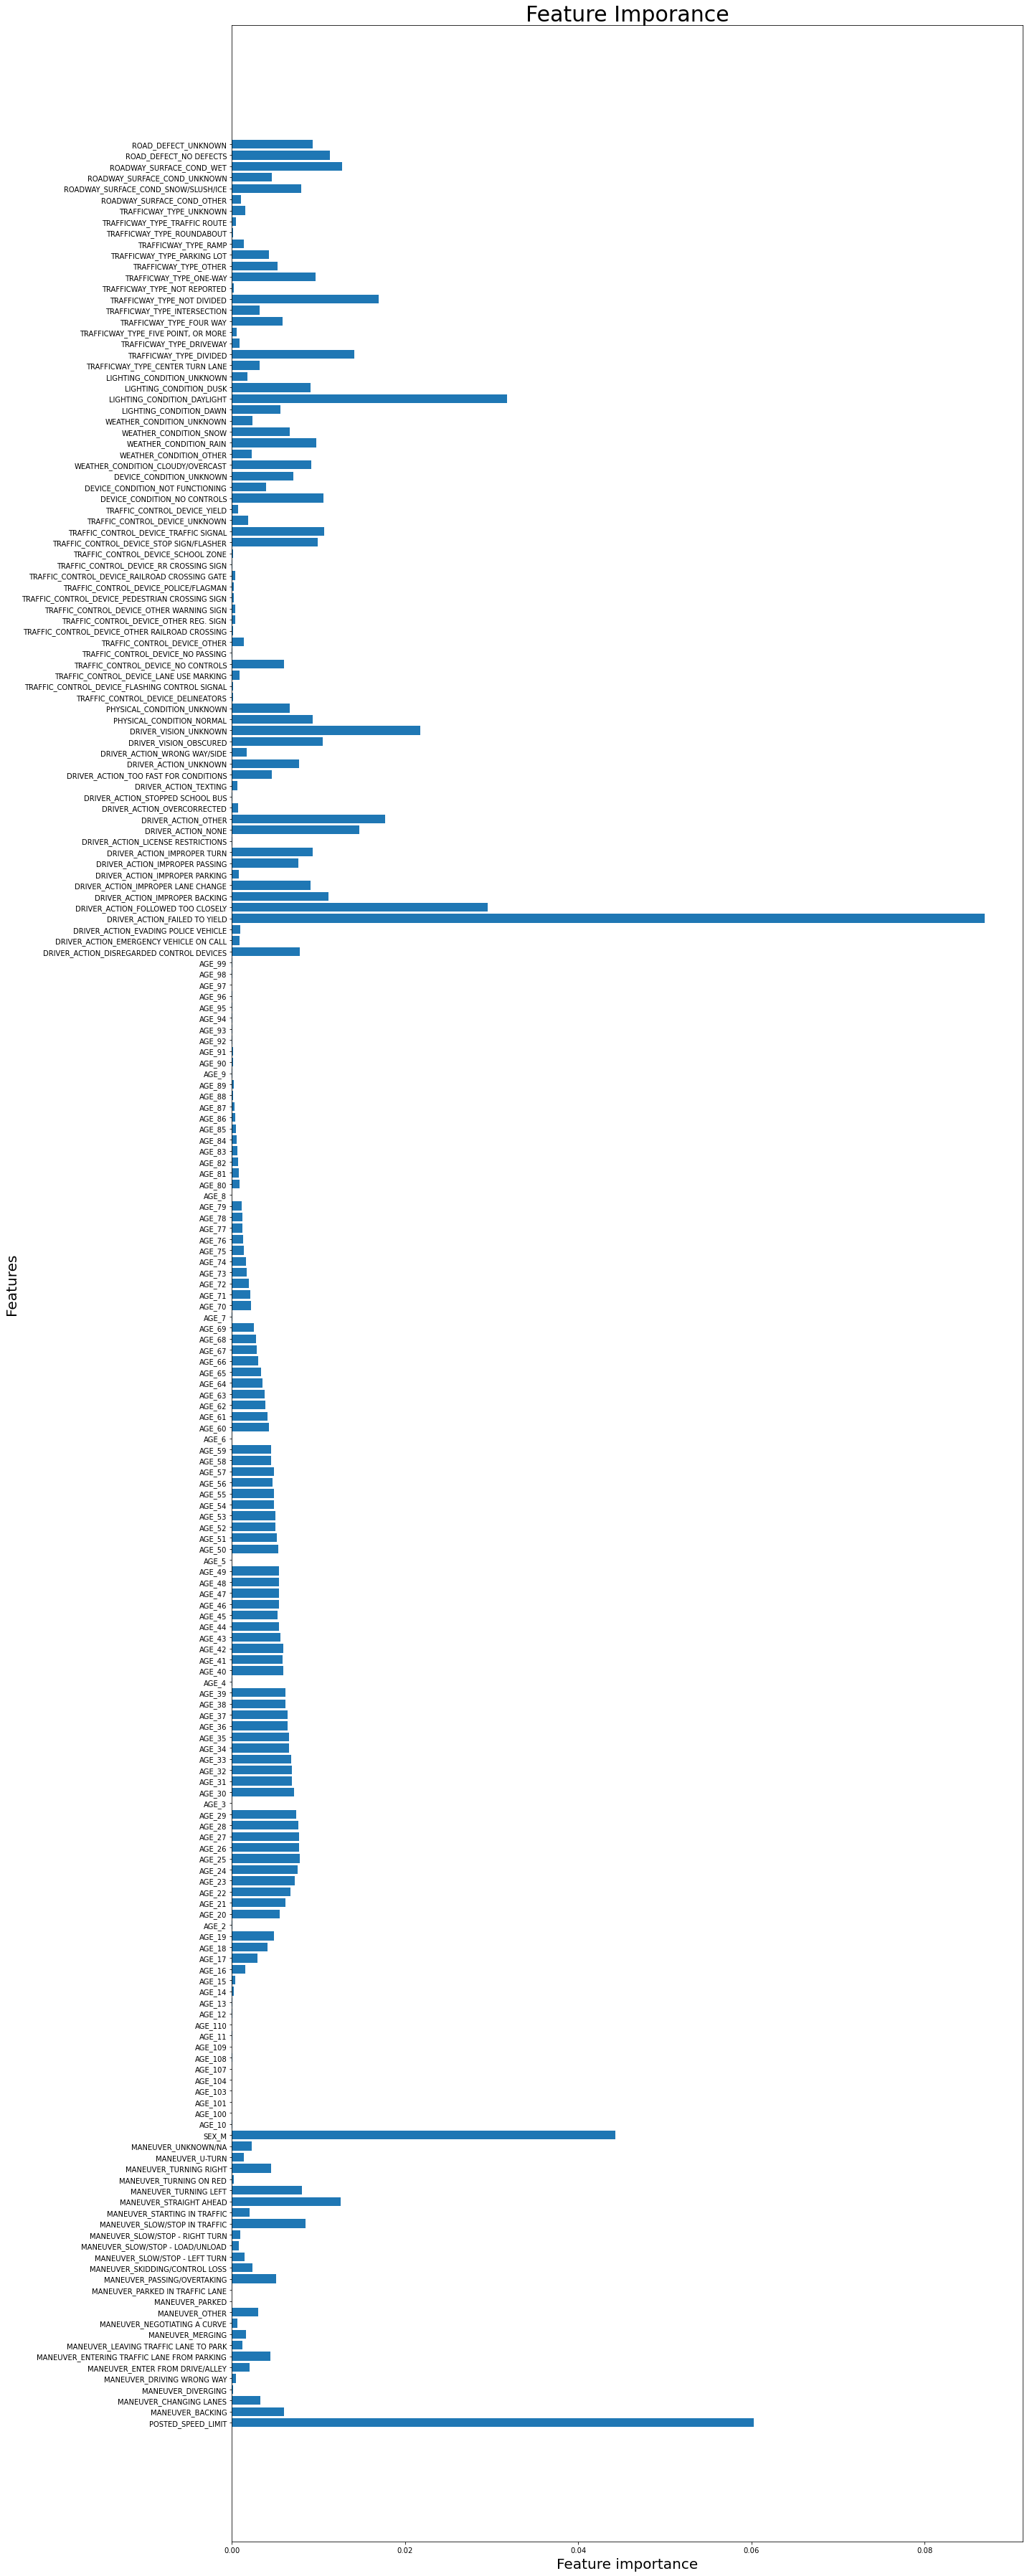

In [114]:
# Plot feature importances
n_features = X_train_scaled.shape[1]
plt.figure(figsize=(20,50))
plt.barh(range(n_features), rfc.feature_importances_, align='center') 
plt.yticks(np.arange(n_features),labels=labels)
plt.title('Feature Imporance', fontsize=30, pad=5)
plt.xlabel('Feature importance', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)
plt.tight_layout()
plt.savefig(r'Graphs\feat_imp_main.png', bbox_inches='tight')

In [115]:
selected_features = X_train.columns[rfc.feature_importances_ > rfc.feature_importances_.mean()]
len(selected_features)

79

In [116]:
print(selected_features)

Index(['POSTED_SPEED_LIMIT', 'MANEUVER_BACKING', 'MANEUVER_PASSING/OVERTAKING',
       'MANEUVER_SLOW/STOP IN TRAFFIC', 'MANEUVER_STRAIGHT AHEAD',
       'MANEUVER_TURNING LEFT', 'SEX_M', 'AGE_19', 'AGE_20', 'AGE_21',
       'AGE_22', 'AGE_23', 'AGE_24', 'AGE_25', 'AGE_26', 'AGE_27', 'AGE_28',
       'AGE_29', 'AGE_30', 'AGE_31', 'AGE_32', 'AGE_33', 'AGE_34', 'AGE_35',
       'AGE_36', 'AGE_37', 'AGE_38', 'AGE_39', 'AGE_40', 'AGE_41', 'AGE_42',
       'AGE_43', 'AGE_44', 'AGE_45', 'AGE_46', 'AGE_47', 'AGE_48', 'AGE_49',
       'AGE_50', 'AGE_51', 'AGE_52', 'AGE_53', 'AGE_54', 'AGE_55', 'AGE_57',
       'DRIVER_ACTION_DISREGARDED CONTROL DEVICES',
       'DRIVER_ACTION_FAILED TO YIELD', 'DRIVER_ACTION_FOLLOWED TOO CLOSELY',
       'DRIVER_ACTION_IMPROPER BACKING', 'DRIVER_ACTION_IMPROPER LANE CHANGE',
       'DRIVER_ACTION_IMPROPER PASSING', 'DRIVER_ACTION_IMPROPER TURN',
       'DRIVER_ACTION_NONE', 'DRIVER_ACTION_OTHER', 'DRIVER_ACTION_UNKNOWN',
       'DRIVER_VISION_OBSCURED', 'DRIVE

Selecting features of importance that are higher than the mean gives us a good insight on the causes of the accidents. Comparing this list with the plot above, we can make out some characterstics about the accidents.

* DRIVER_ACTION_FAILED_TO_YIELD seems to be the most important feature, followed by POSTED_SPEED_LIMIT and SEX_M. This means that these are great predictors to what type of accidents these actions are causing ('INTENATIONAL', or 'UNINTENTIONAL'). And also that these characterstics have a higher probability of causing accidents.
* We also see a trend in age from 19 to 55. The most important age here is 25 after which we see a decreasing trend. This means that drivers are at the most risk of accidents at the age of 25 and decreases as they grow older.
* Traffic controls, weather condition, trafficway type and road conditions also make the list which means that these characterstics are high predictors of an accident. We will look more in depth for these in our case analysis.

With the feature importances in mind, let's move into EDA and analyze the data to support our business case.

1. Identify high-density areas of car crash in Chicago
2. Analyze control failures to identify opportunities for improvement
3. Check for trends in the time of crash to relocate resources appropriately

### EDA 1: Identify high-density areas of car crash in Chicago

We will use the latitudes and longitudes to find areas of accidents in Chicago.

In [241]:
# Import shape file for the streep map of Chicago
street_map = gpd.read_file(r'geo_export_dc279128-6577-44d1-a036-953e894c3e50.shx')

In [250]:
# create a location dataframe
location = df_final[['PRIM_CONTRIBUTORY_CAUSE', 'LONGITUDE', 'LATITUDE']][:25000]

# Specify the coordinate reference system(CRS) and geometry
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(location.LONGITUDE, location.LATITUDE)] 

# Create a geo dataframe
geo_df = gpd.GeoDataFrame(location, crs=crs, geometry=geometry)

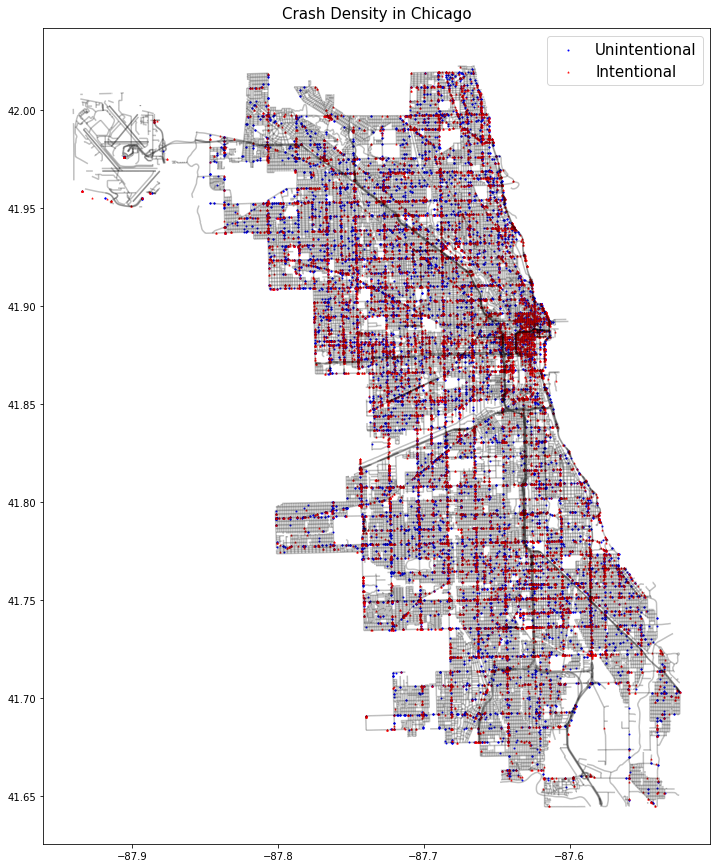

In [485]:
##### Plot the coordinates
fig, ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax=ax, alpha=0.25, color='black')
geo_df[geo_df['PRIM_CONTRIBUTORY_CAUSE'] == 0].plot(ax=ax, markersize=1, color='blue', marker='o', label='Unintentional')
geo_df[geo_df['PRIM_CONTRIBUTORY_CAUSE'] == 1].plot(ax=ax, markersize=1, color='red', marker='^', label='Intentional')
plt.legend(prop={'size':15})
plt.title('Crash Density in Chicago', fontsize=15, pad=10)
plt.savefig(r'Graphs\street_map.png', bbox_inches='tight');

From the map above you can see there is a high density of accidents in the downtown area of Chicago. It is also mostly red, which means that most of the accidents in that area are caused due to intent or driver error. However, we can also see blue plots spread all across the map, which suggests that there are good amount of accidents that are caused unintentionally or have an opportunity of improvement. Let's dive into EDA 2 and 3 to investigate this.

### EDA 2: Analyze control failures to identify opportunities for improvement

In [253]:
df_final.columns

Index(['MANEUVER', 'SEX', 'AGE', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [257]:
factors = df_final[['DRIVER_VISION','POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION',
                    'WEATHER_CONDITION','LIGHTING_CONDITION',
                    'TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND',
                    'ROAD_DEFECT','PRIM_CONTRIBUTORY_CAUSE']].copy()

For this part of EDA we will only use accidents that were caused 'Unintentionally' as this presents us an opportunity to investigate the root cause and help identify areas for improvement.

In [261]:
control_failures = factors[factors.PRIM_CONTRIBUTORY_CAUSE == 0]

In [264]:
control_failures.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1, inplace=True)

In [273]:
control_failures.columns

Index(['DRIVER_VISION', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT'],
      dtype='object')

We will have to create a dictionary to store the value counts of all predictors so we can plot them.

In [392]:
count_dict = {}
for col in control_failures.columns:
    count_dict[str(col)] = control_failures[col].value_counts()

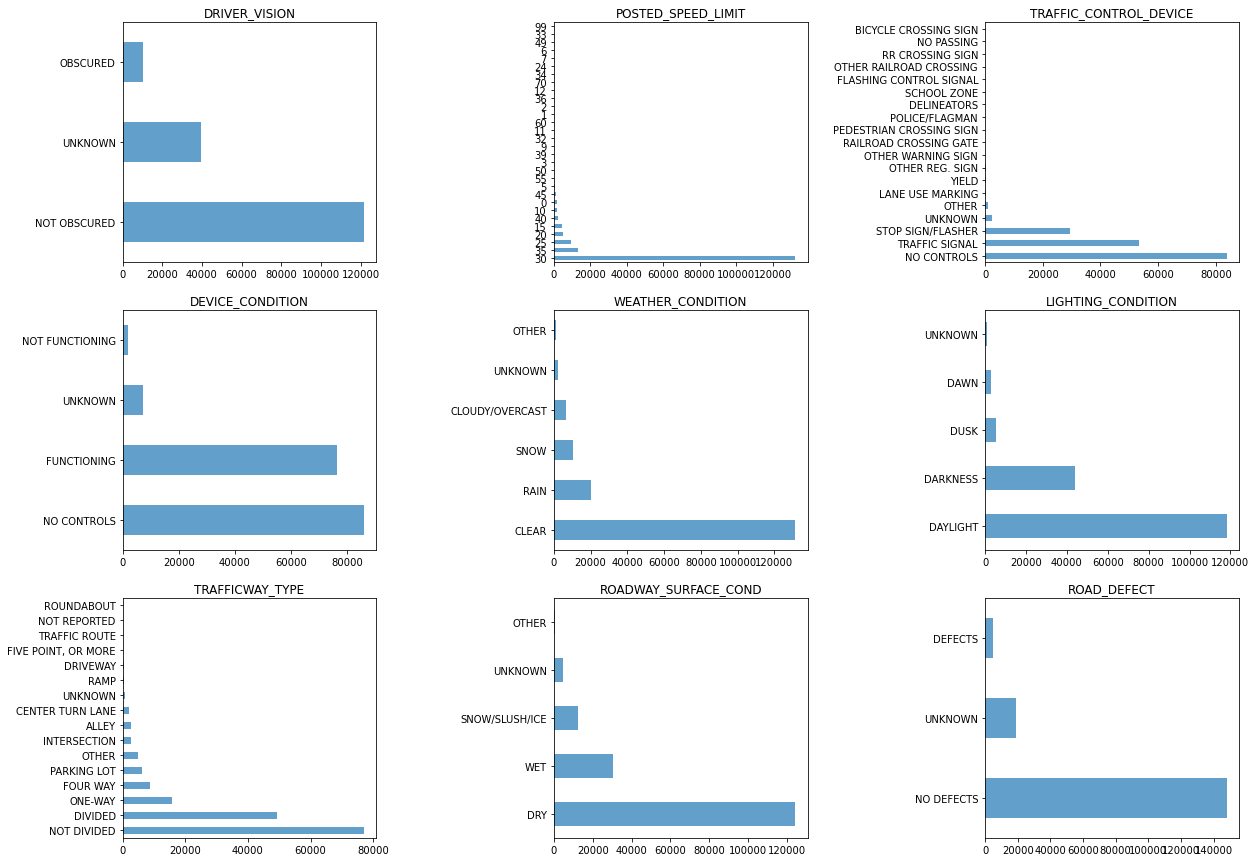

In [486]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.7)

for index, value in enumerate(count_dict):
    ax = plt.subplot(3, 3, index+1)
    chart = pd.DataFrame(count_dict[value])
    chart.plot(ax=ax, kind='barh', legend=False, alpha=0.7)
    ax.set_title(value)
    plt.savefig(r'Graphs\predictor_plots.png', bbox_inches='tight');

From the above plots we can make out the following deduction:

* Most of the accidents have occured when the Driver vision was 'Not Obscured' and presumably was driving at a safe speed limit of 30 mph.
* However, having 'No Traffic Control Devices' has contributed the most to the number of accidents in Chicago. According to this, increasing the number of traffic control devices in the city can lead to a decrease in the number of unintentional accidents. This is also confirmed in the Device Condition plot which shows the highest count when having no controls.
* The weather condition and lighting condition does not seem to contribute much to the accidents.
* We can also see most of the accidents occuring where the trafficway type is 'Not Divided'. This means that dividing the roads can prevent more of these accidents.
* Finally, the roadway surface condition and road defect does not seem to cause much of these accidents either.

### EDA 3: Check for trends in the time of crash to relocate resources appropriately

For this part of the EDA we will use both the intenational and unintentional crash data.

In [445]:
time_of_crash = df_final[['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']].copy()

In [446]:
time_of_crash

,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,22,2,4
1,15,2,2
2,15,2,2
3,13,6,2
4,12,7,2
...,...,...,...
404321,23,5,3
404322,18,5,3
404323,18,5,3
404324,23,5,3


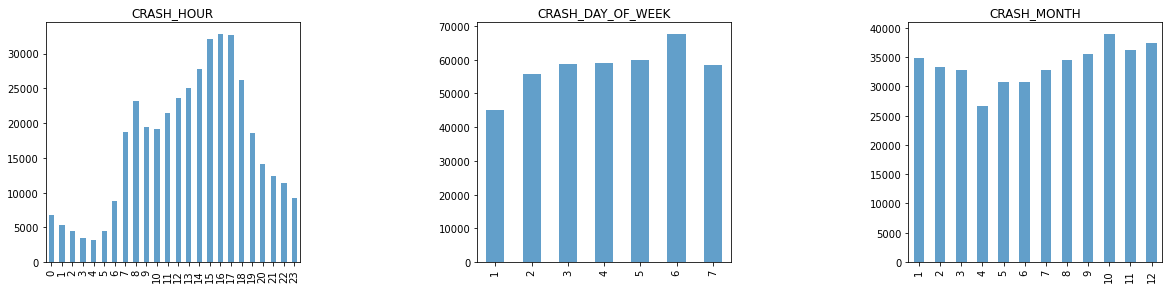

In [487]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.7)

for index, value in enumerate(time_of_crash):
    ax = plt.subplot(3, 3, index+1)
    chart_2 = pd.DataFrame(time_of_crash[value].value_counts()).sort_index()
    chart_2.plot(ax=ax, kind='bar', legend=False, alpha=0.7)
    ax.set_title(value)
    plt.savefig(r'Graphs\time_of_crash.png', bbox_inches='tight');

From the above plots we can see the following trends in time of crash:
    
* Most of the crashes seem to happen between the hours of 4 to 6 in the evening. This might be due to peak rush hour traffic where every one is trying to get back home from work. When we connect this with the crash density map, we can deduce that most of the accidents in Chicago are occuring in the Downtown area during these hours where people are rushing to get home from work. There needs to be better traffic management at these times. We can recommend the city to have more facilitators in the Downtown area during these hours to help manage the flow of traffic and reduce the number of accidents.
* For day of the week, we see increased number of accidents during the weekends. However, they do not differ by much from other days. Looking at this we can say that there should be more focus on the crash hour than the crash day as the crashes dont differ much between the days.
* In terms of crash month, the crashse are pretty consistent all year long. Except for April where we the crashses are the lowest. Currently, we do not have anything to support this so we will assume crashes to be consistent all year long.

Now that we are done with our case analysis let's move on to create a classifier that will classify accidents into 'Unintentional', and 'Intentional' depending on all the predictors we have in our dataset.

Before we start building the model, since we are done with the interpretability of the dataset, we will reduce the dimensions for better accuracy of our model.

### Dimensionality Reduction

#### Principal Component Analysis

In [ ]:
#Instantiate PCA with 95% exlained variance
pca = PCA(.95)

In [ ]:
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

In [ ]:
X_train_transformed.shape

The PCA seems to have reduces our predictor columns from 207 to 180.

### Run the Base model:

### Decision Tree Classifier

In [ ]:
#Instantiate the model with max tree depth of 3
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
%%time
#Fit the model
dtc.fit(X_train_transformed, y_train)

In [ ]:
# Make predictions for train and test data
y_pred_train_dtc = dtc.predict(X_train_transformed)
y_pred_test_dtc = dtc.predict(X_test_transformed)

In [ ]:
# Calculate accuracy 
train_acc = accuracy_score(y_train,y_pred_train_dtc) * 100
test_acc = accuracy_score(y_test, y_pred_test_dtc) * 100
print('Train accuracy is :{0}'.format(train_acc))
print('Test accuracy is :{0}'.format(test_acc))

# Check the AUC for predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_dtc)
roc_auc = auc(fpr, tpr)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred_test_dtc, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
# Visualize confusion matric
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(dtc, X_test_transformed, y_test,
                      cmap=plt.cm.PuBuGn, ax=ax)
ax.set_title('Confusion Matrix: DecisionTreeClassifier', fontsize=18, pad=10)
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.set_ylabel('True Labels', fontsize=15)

plt.grid(False)
plt.savefig(r'Graphs\DTC_confmatx.png', bbox_inches='tight')
plt.show();

In [ ]:
### ROC curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig(r'Graphs\DTC_ROC.png', bbox_inches='tight')
plt.show();

Looking at the ROC, we can see that the model is only somewhat good at predicting the classes. The AUC of 0.62 suggests that the model is correct only 62% of the time or has a precision score of 0.62. Moreover, looking at the ROC we can see that there is a linear relationship between increase in TPR and increase in FPR. At the point of influx, even though we can predict the category .83 times correctly, we misclassify them .58 times incorrectly.

### Re-grow the tree using entropy

In [ ]:
%%time
#Instantiate the model
dtc1 = DecisionTreeClassifier(criterion='entropy')

#Fit the model
dtc1.fit(X_train_transformed, y_train)

# Make predictions for train and test data
y_pred_train_dtc1 = dtc1.predict(X_train_transformed)
y_pred_test_dtc1 = dtc1.predict(X_test_transformed)

# Calculate accuracy 
train_acc1 = accuracy_score(y_train,y_pred_train_dtc1) * 100
test_acc1 = accuracy_score(y_test, y_pred_test_dtc1) * 100
print('Train accuracy is :{0}'.format(train_acc1))
print('Test accuracy is :{0}'.format(test_acc1))

# Check the AUC for predictions
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_test_dtc)
roc_auc1 = auc(fpr1, tpr1)
print('\nAUC is :{0}'.format(round(roc_auc1, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred_test_dtc, rownames=['True'], colnames=['Predicted'], margins=True)

The infomarmation gain criterion 'entropy' does not seem to have made much of a difference. Although it trained well in the training data with over 90% accuracy, it was not able to generalize and predict the test set well.

Let's create a function to test different models.

In [ ]:
def pred_score(clf):    
    # Make predictions on train and test data
    y_pred_train = clf.predict(X_train_transformed)
    y_pred_test = clf.predict(X_test_transformed)
    
    # Calculate accuracy 
    train_acc = accuracy_score(y_train,y_pred_train) * 100
    test_acc = accuracy_score(y_test, y_pred_test) * 100
    print('Train accuracy is :{0}'.format(train_acc))
    print('Test accuracy is :{0}'.format(test_acc))
    
    # Check the AUC for predictions
    roc_auc = roc_auc_score(y_test, y_pred_test)
    print('\nAUC is :{0}'.format(round(roc_auc, 2)))
    
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('-----------------')
    print(pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True))

    # Classification report
    print('\nClassification Report')
    print('----------------------')
    print(classification_report(y_test, y_pred_test))

### Model 1: KNN

In [ ]:
# Instantiate and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

In [ ]:
pred_score(knn)

The KNN seems to be just a tad better than our base mode at 64% accuracy and AUC score of 0.63.

### Model 2: Random Forest

In [ ]:
# Instantiate and fit the model
rf = RandomForestClassifier(n_estimators=100, max_depth= 5)
rf.fit(X_train_transformed, y_train)  

In [ ]:
pred_score(rf1)

Looking at the train and test accuracy, the random forest model shows a better fit than the other two. The AUC is 0.62 and has an average f1-score of 0.60.

### Feature Importance with Random Forest

In [ ]:
n_features = X_train_transformed.shape[1]
plt.figure(figsize=(20,50))
plt.barh(range(n_features), rf.feature_importances_, align='center') 
plt.yticks(np.arange(n_features))
plt.title('Feature Imporance', fontsize=30, pad=5)
plt.xlabel('Feature importance', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)
plt.tight_layout()
plt.savefig(r'Graphs\feat_imp.png', bbox_inches='tight')

The feature importance shows us a list of high predicting features and those are less important to our model.

### Selecting best features

In [ ]:
# Print the name and gini importance of each feature
for feature in zip(range(n_features), rf.feature_importances_):
    print(feature)

In [ ]:
# Box plot
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=rf1.feature_importances_)
plt.savefig(r'Graphs\box_plot.png', bbox_inches='tight');

In [ ]:
rf1.feature_importances_.max()

In [ ]:
# Check the distribution of feature scores
from scipy.stats import norm
import statistics
  
# Plot between -0.05 and 0.2 with .001 steps.
x_axis = np.arange(-0.05,0.2,.001)
  
# Calculating mean and standard deviation
mean = statistics.mean(rf.feature_importances_)
sd = statistics.stdev(rf.feature_importances_)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title('Feature Importance Normal Distribution')
plt.ylabel('No. of Features')
plt.xlabel('Feature Importance')
plt.savefig(r'Graphs\norm_dist.png', bbox_inches='tight')
plt.show();

In [ ]:
thresh_1 = [x for x in rf.feature_importances_ if x > 0.01]
len(thresh_1)

We will use a threshold of 0.01 to only include 23 of the best predictors.

In [ ]:
# Instantiate and fit the model
sfm = SelectFromModel(rf, threshold=0.01)

sfm.fit(X_train_transformed, y_train)

In [ ]:
# Transform the data to create a new dataset containing only the most important features
X_best_train = sfm.transform(X_train_transformed)
X_best_test = sfm.transform(X_test_transformed)

In [ ]:
# Instantiate and fit the model
rf_best = RandomForestClassifier(n_estimators=100, max_depth= 5)
rf_best.fit(X_best_train, y_train)

In [ ]:
# Make predictions on train and test data
y_pred_train_rfb = rf_best.predict(X_best_train)
y_pred_test_rfb = rf_best.predict(X_best_test)
    
# Calculate accuracy 
train_acc_rfb = accuracy_score(y_train,y_pred_train_rfb) * 100
test_acc_rfb = accuracy_score(y_test, y_pred_test_rfb) * 100
print('Train accuracy is :{0}'.format(train_acc_rfb))
print('Test accuracy is :{0}'.format(test_acc_rfb))
    
# Check the AUC for predictions
roc_auc_rfb = roc_auc_score(y_test, y_pred_test_rfb)
print('\nAUC is :{0}'.format(round(roc_auc_rfb, 2)))
    
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('-----------------')
print(pd.crosstab(y_test, y_pred_test_rfb, rownames=['True'], colnames=['Predicted'], margins=True))

# Classification report
print('\nClassification Report')
print('----------------------')
print(classification_report(y_test, y_pred_test_rfb))

Here, you can see a great fit with almost identical train and test accuracy scores. The AUC is also 0.64, which means that the model has captured most of the information in the dataset with less features. The run time for the model was also considerably less than the base model. We will use these selected features going forward.

In [ ]:
# Define function for X_best datasets

def pred_score_best(clf):    
    # Make predictions on train and test data
    y_pred_train = clf.predict(X_best_train)
    y_pred_test = clf.predict(X_best_test)
    
    # Calculate accuracy 
    train_acc = accuracy_score(y_train,y_pred_train) * 100
    test_acc = accuracy_score(y_test, y_pred_test) * 100
    print('Train accuracy is :{0}'.format(train_acc))
    print('Test accuracy is :{0}'.format(test_acc))
    
    # Check the AUC for predictions
    roc_auc = roc_auc_score(y_test, y_pred_test)
    print('\nAUC is :{0}'.format(round(roc_auc, 2)))
    
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('-----------------')
    print(pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True))

    # Classification report
    print('\nClassification Report')
    print('----------------------')
    print(classification_report(y_test, y_pred_test))


### Model 3: XG Boost

In [ ]:
# Instantiate and fit the model
xg = xgb.XGBClassifier()
xg.fit(X_best_train, y_train)

In [ ]:
pred_score_best(xg)

The accuracy scores are 74% to 70% for train vs test. The model seems to be a good fit. The AUC is also 0.68 which is better than our previous models. We will take this further and tune for better performance.

### Tuning XGBoost with GridSearchCV

First we will create a grid for the algorithm to loop through.

In [ ]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6,12],
    'min_child_weight': [5,10],
    'subsample': [0.7,1.4],
    'n_estimators': [5, 30, 100, 250],
}

In [ ]:
# Instantiate and fit the model
grid_clf = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_best_train, y_train)

In [ ]:
# Print the best parameters
best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
# Calcualte the score
pred_score_best(grid_clf)

We can see that the tuned model is not any better than the regular XGBoost model. We might have reached the highest level of precision with this transformed dataset. We will keep this as our final model.

The model is a good fit as the test accuracy is slightly lower than the train accuracy at 70.6%. The AUC score is also 0.68 and f1-score of 0.61 an 0.76 respectively.

In [ ]:
# Visualize confusion matric
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(grid_clf, X_best_test, y_test,
                      cmap=plt.cm.PuBuGn, ax=ax)
ax.set_title('Confusion Matrix: XGBoost Tuned', fontsize=18, pad=10)
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.set_ylabel('True Labels', fontsize=15)

plt.grid(False)
plt.savefig(r'Graphs\xbg_confmatx.png', bbox_inches='tight')
plt.show();

### Conclusion

Finally, we will conclude our classifer will be the tuned XGBoost model. We can derive the following conclusions from the scores:

* The model has an accuracy of 71%, which means that for every predicted class, the model is only correct 71% of the time.
* The AUC score is 0.68, which suggests that in case of an accident there is a 68% chance the model will correctly distinguish the intentional event from an unintenational one. 
* The Recall gives us the exact number of times the model was able to accurately identify each event. For '0' or 'Unintentional', the model was able to classify it only 54% of the time. While for '1' or 'Intenational', the model was able to accuately classify it 83% of the time. 
* The Precision gives us number of time the model was correct on classifying each category. Both 'Unintenational' and 'Intentional' catergories were classified about 70% times correctly.
* F1-Score is the harmonic mean between Precision and Recall. It is a better measure for model accuracy since it considers both precision and recall for each category. Here, we have a f1-score of 0.61 and 0.76 for each of our categories respectively. From the difference, we can also infer that is some class imbalance between the two categories.